In [1]:
try: import clmm
except:
    import notebook_install
    notebook_install.install_clmm_pipeline(upgrade=False)
    import clmm
import matplotlib.pyplot as plt
import numpy as np
from astropy import units
plt.rcParams['font.family']=['gothambook','gotham','gotham-book','serif']

clmm.__version__


/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:35: UserWarning: CLMM Backend requested `ccl' is not available, trying others...
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:45: UserWarning: * NumCosmo BACKEND also not available
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/__init__.py:42: UserWarning: * USING cluster_toolkit+astropy BACKEND


'0.9.3'

In [2]:
import clmm.dataops as da
import clmm.galaxycluster as gc
import clmm.theory as theory
from clmm import Cosmology


In [3]:
from clmm.support import mock_data as mock


In [4]:
np.random.seed(11)


In [5]:
cosmo = Cosmology(H0 = 70.0, Omega_dm0 = 0.27 - 0.045, Omega_b0 = 0.045, Omega_k0 = 0.0)


In [6]:
import random
#cluster_m = random.randint(10,100) # Masse grenzen für den Cluster
#logm = np.log(cluster_m)/np.log(10)
#concentration = random.randint(1,100)
#cluster_ra = 0.
#cluster_dec = 0.
#cluster_z = random.uniform(0.1,0.6)
#ngals = random.randint(50,100000) 
#cluster_1 = cluster_m, concentration, cluster_ra, cluster_dec, cluster_z, ngals
#print(cluster_m)
#print(concentration)
#print(cluster_z)
#print(ngals)
#print(cluster_1)

In [7]:
import random
random.seed(22) #gibt einem immer die gleichen zufälligen zahlen
import numpy as np
np.set_printoptions(precision=3)   
num = 5
cluster_data = np.zeros((num,7))
for k in range(num):
        
    cluster_data[k][0] = np.random.randint(1.e14,1.e15) #masse
    cluster_data[k][6] = np.log(cluster_data[k][0])/np.log(10)
    cluster_data[k][2] = 0
    cluster_data[k][3] = 0
    cluster_data[k][4] = np.random.uniform(0.1,0.6)
    cluster_data[k][1] = 5.72/((1+cluster_data[k][4])**0.71)*(cluster_data[k][0]/10.e14)**(-0.081)
    cluster_data[k][5] = np.random.randint(50,10000)
print(cluster_data)



[[7.065e+14 5.464e+00 0.000e+00 0.000e+00 1.097e-01 4.073e+03 1.485e+01]
 [4.574e+14 5.031e+00 0.000e+00 0.000e+00 3.101e-01 3.914e+03 1.466e+01]
 [5.513e+14 4.867e+00 0.000e+00 0.000e+00 3.437e-01 3.935e+03 1.474e+01]
 [5.804e+14 4.558e+00 0.000e+00 0.000e+00 4.650e-01 8.382e+03 1.476e+01]
 [3.809e+14 4.654e+00 0.000e+00 0.000e+00 4.927e-01 1.305e+03 1.458e+01]]


In [8]:
import astropy
import numpy as np
ideal_data = []
noisy_data = []

for k in range(num):
    logm = cluster_data[k][6]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    buggy_data = mock.generate_galaxy_catalog(cluster_m, cluster_z, concentration, cosmo, 'chang13', zsrc_min = cluster_z + 0.1,shapenoise=0.05, photoz_sigma_unscaled=0.05, ngals=ngals) 
    
    #sortiert nachher die galaxien raus die den falschen redshift besitzen
    mask = buggy_data['z'] < cluster_z #die galaxien sollten entfernt werden nicht maskiert...nur vorrübergehend
    #print(buggy_data['z'][mask])
    #print('cluster rotversciebung')
    #print(cluster_data[k][4])
   
    buggy_data['z'] = np.where(buggy_data['z'] < cluster_z, np.random.uniform(cluster_z,cluster_z+0.1), buggy_data['z'])
    #print(buggy_data['z'])
    #print('hats geklappt?')
    mask = buggy_data['z'] < cluster_z
    #print(buggy_data['z'][mask])
    realredshift = buggy_data['z']
    #print(sum(buggy_data['z']<=0))

    ideal_data.append( mock.generate_galaxy_catalog(cluster_m , cluster_z, concentration, cosmo, 'chang13', zsrc_min = cluster_z + 0.1, ngals = ngals)) 
    noisy_data.append(buggy_data)

                                            

#print(ideal_data)
    

/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:71: UserWarning: Some source redshifts are lower than the cluster redshift. Returning Sigma_crit = np.inf for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarning: divide by zero encountered in true_divide
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/theory/func_layer.py:347: UserWarning: Some source redshifts are lower than the cluster redshift. kappa = 0 for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:71: UserWarning: Some source redshifts are lower than the cluster redshift. Returning Sigma_crit = np.inf for those galaxies.
/Users/nicomasii/opt/anaconda3/lib/python3.8/site-packages/clmm-0.9.3-py3.8.egg/clmm/cosmology/cluster_toolkit.py:81: RuntimeWarnin

In [9]:
#https://docs.astropy.org/en/stable/table/operations.html#binning
#groupbi
#https://docs.astropy.org/en/stable/table/masking.html


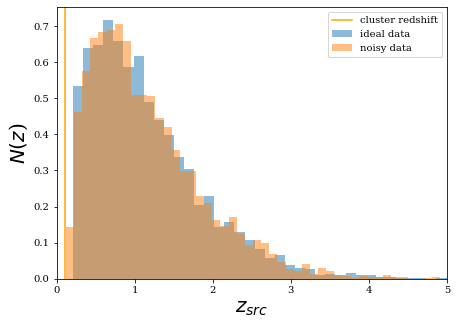

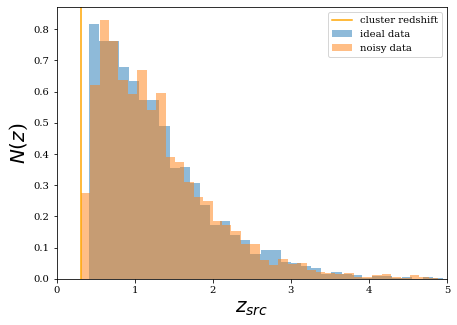

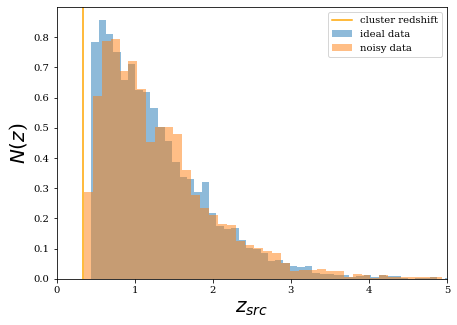

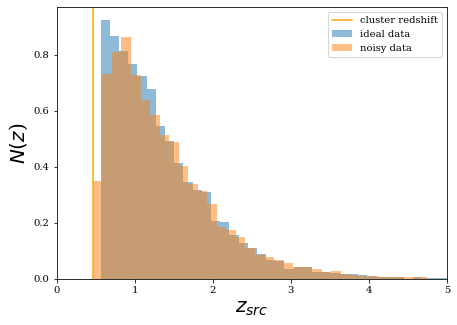

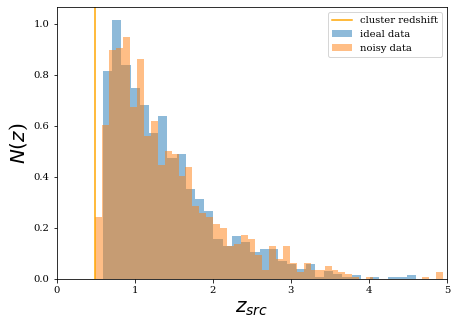

In [10]:
for k in range(num):
    plt.figure(figsize=(7,5))
    plt.hist(ideal_data[k]['z'], density = True, alpha=0.5, bins = 50, label='ideal data')
    plt.hist(noisy_data[k]['z'], alpha=0.5, density = True, bins = 50, label='noisy data')
    plt.axvline(x = cluster_data[k][4], color='orange', label = 'cluster redshift')
    plt.xlabel(r'$z_{src}$', fontsize = 20)
    plt.ylabel(r'$N(z$)', fontsize = 20)
    plt.legend()
    plt.xlim(0,5)
    

In [11]:
gc_object =[]

for k in range(num):
    logm = cluster_data[k][6]
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    cluster_id = "CL_ideal"
    gc_object.append( clmm.GalaxyCluster(cluster_id, cluster_ra, cluster_dec,
                                  cluster_z, ideal_data[k]))
    gc_object[k].save('ideal_GC_'+str(k)+'.pkl')

gc_object =[]

for k in range(num):
    logm = cluster_data[k][6]
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    cluster_id = "CL_noisy"
    gc_object.append( clmm.GalaxyCluster(cluster_id, cluster_ra, cluster_dec,
                                  cluster_z, noisy_data[k]))
    gc_object[k].save('noisy_GC_'+str(k)+'.pkl')


In [12]:
cl_ideal = []
cl_noisy = []
for k in range(num):
    cl_ideal.append (clmm.GalaxyCluster.load('ideal_GC_'+str(k)+'.pkl'))
    cl_noisy.append (clmm.GalaxyCluster.load('noisy_GC_'+str(k)+'.pkl'))
    

In [13]:
#for k in range(num):
    #plt.figure(figsize=(7,5))
    #plt.hist(cl_ideal[k].galcat['z'], density = True, bins = 50)
    #plt.axvline(x = cluster_z, color='orange', label = 'cluster redshift')
    #plt.xlabel(r'$z_{src}$', fontsize = 20)
    #plt.ylabel(r'$N(z$)', fontsize = 20)
    #plt.legend()
    #plt.xlim(0,5)
    

In [14]:
for k in range(num):
    cl_ideal[k].compute_tangential_and_cross_components(geometry="flat")
    cl_noisy[k].compute_tangential_and_cross_components(geometry="flat")
pass


In [15]:
bin_edges = da.make_bins(0.2, 4, 15, method='evenlog10width')


In [16]:
help(mask)

Help on ndarray object:

class ndarray(builtins.object)
 |  ndarray(shape, dtype=float, buffer=None, offset=0,
 |          strides=None, order=None)
 |  
 |  An array object represents a multidimensional, homogeneous array
 |  of fixed-size items.  An associated data-type object describes the
 |  format of each element in the array (its byte-order, how many bytes it
 |  occupies in memory, whether it is an integer, a floating point number,
 |  or something else, etc.)
 |  
 |  Arrays should be constructed using `array`, `zeros` or `empty` (refer
 |  to the See Also section below).  The parameters given here refer to
 |  a low-level method (`ndarray(...)`) for instantiating an array.
 |  
 |  For more information, refer to the `numpy` module and examine the
 |  methods and attributes of an array.
 |  
 |  Parameters
 |  ----------
 |  (for the __new__ method; see Notes below)
 |  
 |  shape : tuple of ints
 |      Shape of created array.
 |  dtype : data-type, optional
 |      Any objec

In [17]:

for k in range(num):
    cluster_z = cluster_data[k][4]
    a = cl_ideal[k].make_radial_profile("Mpc",include_empty_bins=True, bins=bin_edges, cosmo=cosmo, gal_ids_in_bins=True,)#return_binnumber=True does not work
    b = cl_noisy[k].make_radial_profile("Mpc",include_empty_bins=True, bins=bin_edges,cosmo=cosmo, gal_ids_in_bins=True,)
    print(np.shape(cl_ideal[k].profile['z']))
    #print(cl_ideal[k].profile['z'])
    maski = cl_ideal[k].profile['z'] > cluster_z
    maskn = cl_noisy[k].profile['z'] > cluster_z
    mask= maski*maskn
    #print(cl_ideal[k].profile['z'])
    #where_z_broken = np.where(cl_ideal[k].profile['z'] < cluster_z)
    cl_ideal[k].profile =  cl_ideal[k].profile[mask]
    cl_noisy[k].profile =  cl_noisy[k].profile[mask]
    print(np.shape(cl_noisy[k].profile['z']))
    #print(cl_ideal[k].profile['z'])
    #print(k)
    #print(a)
pass


(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)
(15,)


In [18]:
def model_reduced_tangential_shear_singlez(r, logm, z_src):
    m = 10.**logm
    gt_model = clmm.compute_reduced_tangential_shear(r,
                                                     m, concentration,
                                                     cluster_z, z_src, cosmo,
                                                     delta_mdef=200,
                                                     halo_profile_model='nfw')    
    return gt_model

In [19]:
def model_reduced_tangential_shear_zdistrib(radius, logm, data, catalog, profile): 
    m = 10**logm
    gt_model = []
    for i in range(len(radius)):
        
        r = profile['radius'][i]
        galist = profile['gal_id'][i]
        
        z_list = catalog.galcat['z'][galist]
        shear = clmm.compute_reduced_tangential_shear(r, m, concentration, 
                                                      cluster_z, z_list, cosmo, delta_mdef=200, 
                                                      halo_profile_model='nfw')
        if len(galist) == 0:
            gt_model.append(1e-16)
            
        else:
            gt_model.append(np.mean(shear))
            #print(np.mean(shear))

    return gt_model

In [20]:
gt_model_ideal_singlez = []
gt_model_ideal_zdistrib = []
gt_model_noisy_singlez = []
gt_model_noisy_zdistrib = []
r=[]
for k in range(num):
    print(k)
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    logm = cluster_data[k][6]
    r.append(cl_ideal[k].profile['radius'])
    #mask = r < 1.e-11
    #r = np.where(r < 1.e-11, np.random.uniform(1.e-11,3), r)
    #print(cl_ideal[k].profile['z'])
    #print(cl_noisy[k].profile['z'])
    #print(np.shape(cl_noisy[k].profile))
    gt_model_ideal_singlez.append(model_reduced_tangential_shear_singlez(r[k], logm,cl_ideal[k].profile['z']))
    gt_model_ideal_zdistrib.append(model_reduced_tangential_shear_zdistrib(r[k],logm, ideal_data[k], cl_ideal[k], cl_ideal[k].profile,))
    gt_model_noisy_singlez.append(model_reduced_tangential_shear_singlez(r[k],logm,cl_noisy[k].profile['z']))
    gt_model_noisy_zdistrib.append(model_reduced_tangential_shear_zdistrib(r[k],logm,noisy_data[k], cl_noisy[k], cl_noisy[k].profile,))
    

0
1
2
3
4


0
1
2
3
4


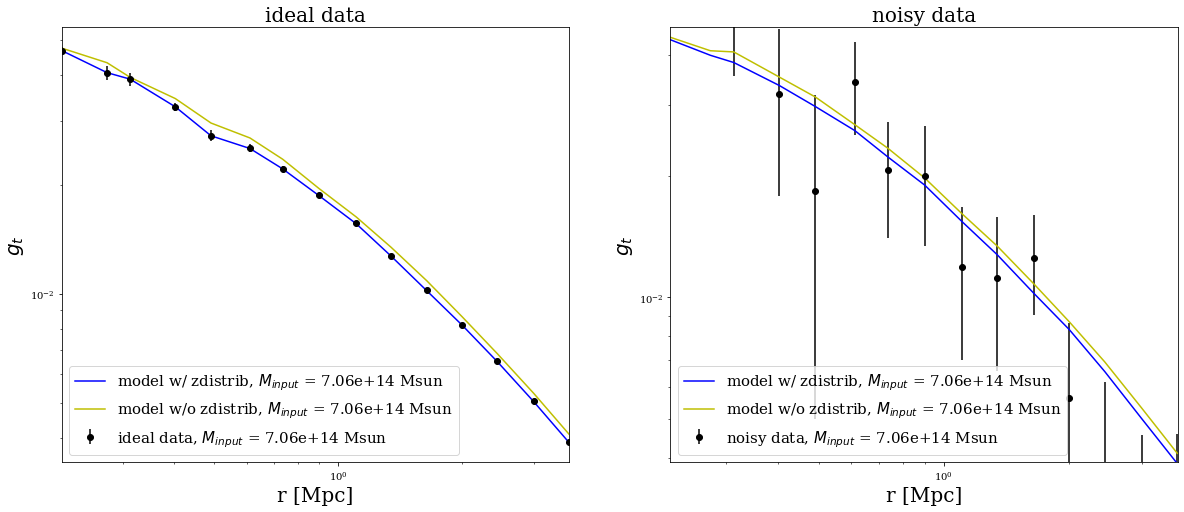

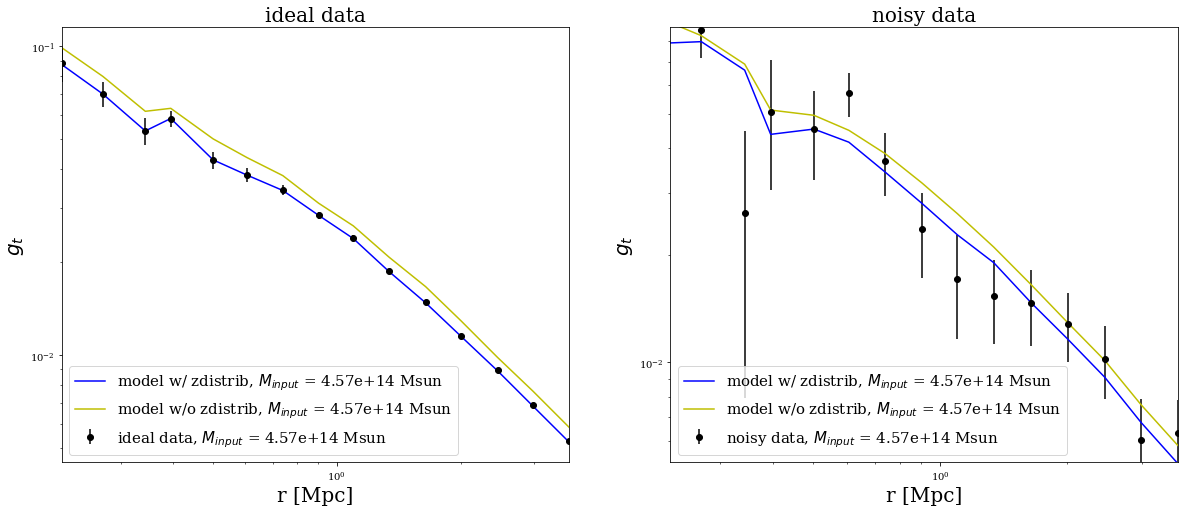

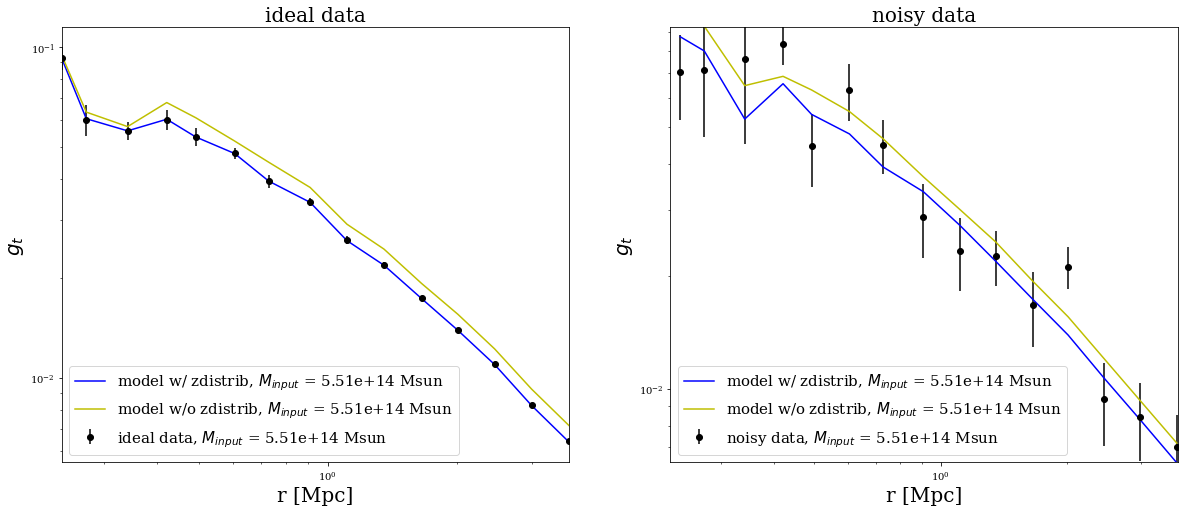

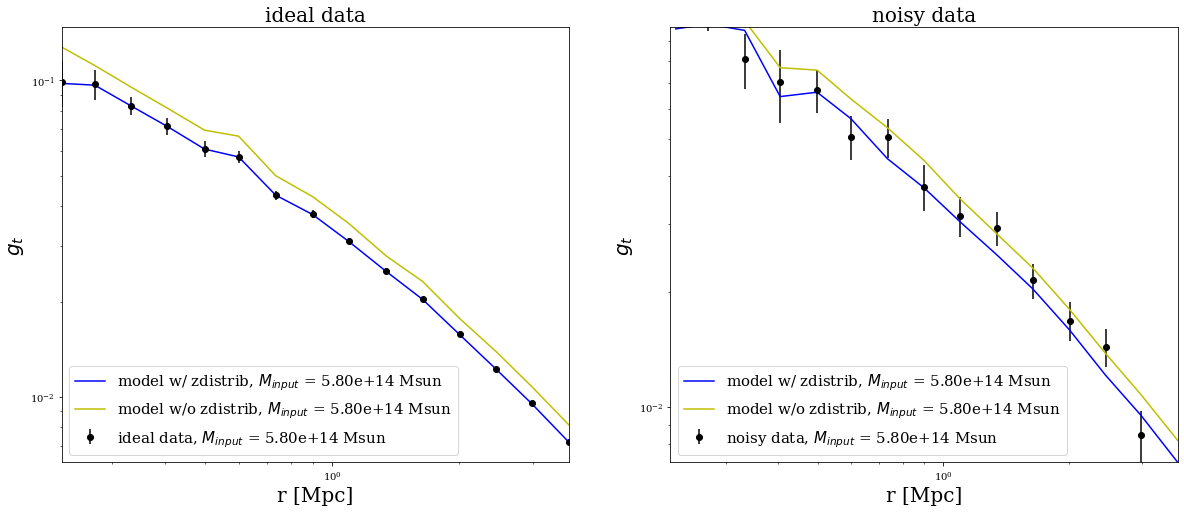

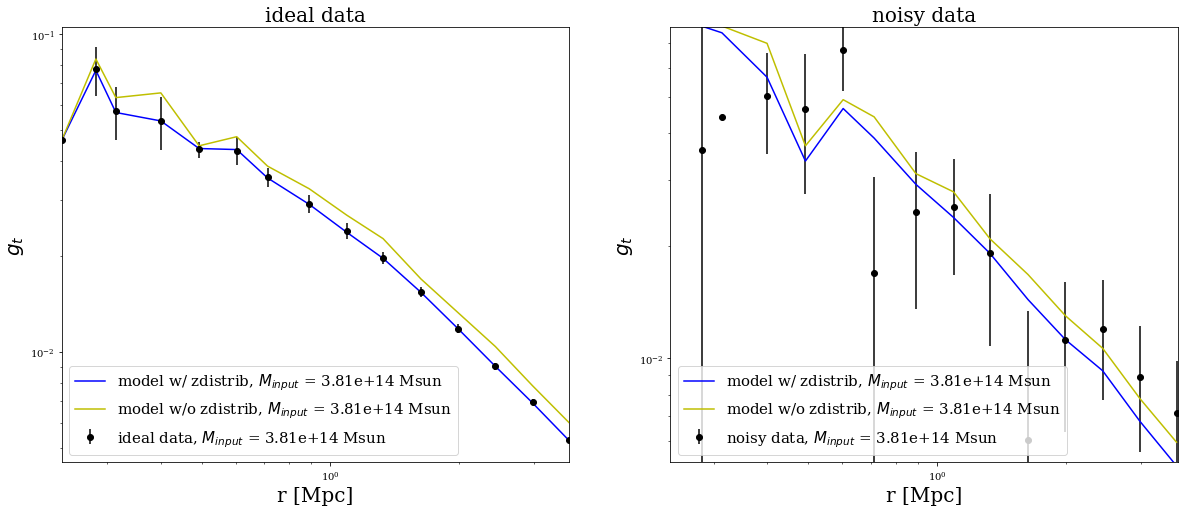

In [21]:
for k in range (num):
    print(k)
    cluster_ra = cluster_data[k][2]
    cluster_dec = cluster_data[k][3]
    cluster_m = cluster_data[k][0]
    cluster_z = cluster_data[k][4]
    concentration = cluster_data[k][1]
    ngals = int(cluster_data[k][5])
    logm = cluster_data[k][6]
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)

    plt.title('ideal data', fontsize=20)
    plt.errorbar(r[k],cl_ideal[k].profile['gt'],cl_ideal[k].profile['gt_err'],c='k',linestyle='', 
                 marker='o', label=r'ideal data, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r[k],gt_model_ideal_zdistrib[k],'b',  label=r'model w/ zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r[k],gt_model_ideal_singlez[k],'-y',  label=r'model w/o zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.xlabel('r [Mpc]', fontsize = 20)
    plt.ylabel(r'$g_t$', fontsize = 20)
    plt.xlim(min(cl_ideal[k].profile['radius']), max(cl_ideal[k].profile['radius']))
    plt.legend(fontsize = 15)

    plt.subplot(1,2,2)

    plt.title('noisy data', fontsize=20)
    plt.errorbar(r[k],cl_noisy[k].profile['gt'],cl_noisy[k].profile['gt_err'],c='k',linestyle='', 
                 marker='o',label=r'noisy data, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r[k],gt_model_noisy_zdistrib[k],'-b', label=r'model w/ zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.loglog(r[k],gt_model_noisy_singlez[k],'-y', label=r'model w/o zdistrib, $M_{input}$ = %.2e Msun' % cluster_m)
    plt.xlabel('r [Mpc]', fontsize = 20)
    plt.ylabel(r'$g_t$', fontsize = 20)
    plt.xlim(min(cl_noisy[k].profile['radius']), max(cl_noisy[k].profile['radius']))
    plt.ylim(min(gt_model_ideal_zdistrib[k]),max(gt_model_ideal_zdistrib[k]))
    plt.legend(fontsize = 15)

In [22]:
from clmm.support.sampler import fitters

In [23]:
print(logm)

14.580849001867467


In [36]:
m_est_ideal_zdistrib = [None]*num
m_est_err_ideal_zdistrib = [None]*num
for k in range(num):
    logm = cluster_data[k][6]
    print(k)
    print(logm)
    func = lambda r, logm : model_reduced_tangential_shear_zdistrib(r,logm, ideal_data[k],
                                                        cl_ideal[k], cl_ideal[k].profile)
    popt,pcov = fitters['curve_fit'](func, 
                        cl_ideal[k].profile['radius'], 
                        cl_ideal[k].profile['gt'], 
                        cl_ideal[k].profile['gt_err'], bounds=[10.,16.], p0=14.6)
    print(popt)
    print(pcov)
    m_est_ideal_zdistrib[k] = 10.**popt[0]
    m_est_err_ideal_zdistrib[k] =  m_est_ideal_zdistrib[k] * np.sqrt(pcov[0][0]) * np.log(10) 
    print(m_est_ideal_zdistrib[k])
    print(m_est_err_ideal_zdistrib[k])
    print(logm)
    

0
14.84910499259879
[14.525]
[[0.]]
335303296880301.06
14033902350295.361
14.84910499259879
1
14.66029719706645
[14.657]
[[8.814e-06]]
453482688672310.56
3099931772676.571
14.66029719706645
2
14.741365752201935
[14.747]
[[1.277e-05]]
558817314869718.56
4597633893980.141
14.741365752201935
3
14.763730773395748
[14.771]
[[8.598e-07]]
590012744867427.6
1259700427872.282
14.763730773395748
4
14.580849001867467


ValueError: Residuals are not finite in the initial point.

In [38]:
m_est_ideal_singlez = [None]*num
m_est_err_ideal_singlez = [None]*num
for k in range(num):
    logm = cluster_data[k][6]
    funct = lambda r, logm : model_reduced_tangential_shear_singlez(r, logm, cl_ideal[k].profile['z'])
    popt,pcov = fitters['curve_fit'](funct, 
                        cl_ideal[k].profile['radius'], 
                        cl_ideal[k].profile['gt'], 
                        cl_ideal[k].profile['gt_err'], bounds=[10.,17.])

    m_est_ideal_singlez[k] = 10.**popt[0]
    m_est_err_ideal_singlez[k] = m_est_ideal_singlez[k] * np.sqrt(pcov[0][0]) * np.log(10)
    print(m_est_ideal_singlez[k])
    print(m_est_err_ideal_singlez[k])


237735531523977.6
9678645747593.137
342456635152525.5
3375377975657.0137
432564564821421.3
4376179499746.855
492750177801848.9
2934313563461.1616


ValueError: Residuals are not finite in the initial point.

In [26]:
m_est_noisy_zdistrib = [None]*num
m_est_err_noisy_zdistrib = [None]*num
for k in range(num):
    logm = cluster_data[k][6]
    funct = lambda r, logm : model_reduced_tangential_shear_zdistrib(r, logm, noisy_data[k], cl_noisy[k], cl_noisy[k].profile) 
    popt,pcov = fitters['curve_fit'](funct, 
                        cl_noisy[k].profile['radius'], 
                        cl_noisy[k].profile['gt'], 
                        cl_noisy[k].profile['gt_err'],) #bounds=[10.,16.])

    m_est_noisy_zdistrib[k] = 10.**popt[0]
    m_est_err_noisy_zdistrib[k] =  m_est_noisy_zdistrib[k] * np.sqrt(pcov[0][0]) * np.log(10) 



In [27]:
m_est_noisy_singlez = [None]*num
m_est_err_noisy_singlez =[None]*num
for k in range(num):
    logm = cluster_data[k][6]
    funct = lambda r, logm : model_reduced_tangential_shear_singlez(r, logm, cl_noisy[k].profile['z'])
    popt,pcov = fitters['curve_fit'](funct, 
                        cl_noisy[k].profile['radius'], 
                        cl_noisy[k].profile['gt'], 
                        cl_noisy[k].profile['gt_err'],) #bounds=[10.,16.])

    m_est_noisy_singlez[k] = 10.**popt[0]
    m_est_err_noisy_singlez[k] =  m_est_noisy_singlez[k] * np.sqrt(pcov[0][0]) * np.log(10) 
print(m_est_err_noisy_singlez[0])

inf


In [28]:
for k in range(num):
    print(f'Cluster {k}')
    
    print(f'The input mass = {cluster_m:.2e} Msun\n')

    print("Without accounting for the redshift distribution in the model\n")
    print(f'Best fit mass for ideal data = {m_est_ideal_singlez[k]:.2e} +/- {m_est_err_ideal_singlez[k]:.2e} Msun')
    print(f'Best fit mass for noisy data = {m_est_noisy_singlez[k]:.2e} +/- {m_est_err_noisy_singlez[k]:.2e} Msun\n')

    print("Accounting for the redshift distribution in the model\n")
    print(f'Best fit mass for ideal data = {m_est_ideal_zdistrib[k]:.2e} +/- {m_est_err_ideal_zdistrib[k]:.2e} Msun')
    print(f'Best fit mass for noisy data = {m_est_noisy_zdistrib[k]:.2e} +/- {m_est_err_noisy_zdistrib[k]:.2e} Msun')

Cluster 0
The input mass = 3.81e+14 Msun

Without accounting for the redshift distribution in the model

Best fit mass for ideal data = 1.00e+01 +/- inf Msun
Best fit mass for noisy data = 1.00e+01 +/- inf Msun

Accounting for the redshift distribution in the model

Best fit mass for ideal data = 1.00e+01 +/- inf Msun
Best fit mass for noisy data = 1.00e+01 +/- inf Msun
Cluster 1
The input mass = 3.81e+14 Msun

Without accounting for the redshift distribution in the model

Best fit mass for ideal data = 1.00e+01 +/- inf Msun
Best fit mass for noisy data = 1.00e+01 +/- inf Msun

Accounting for the redshift distribution in the model

Best fit mass for ideal data = 1.00e+01 +/- inf Msun
Best fit mass for noisy data = 1.00e+01 +/- inf Msun
Cluster 2
The input mass = 3.81e+14 Msun

Without accounting for the redshift distribution in the model

Best fit mass for ideal data = 1.00e+01 +/- inf Msun
Best fit mass for noisy data = 1.00e+01 +/- inf Msun

Accounting for the redshift distribution i

In [29]:
gt_est_ideal_zdistrib = [None]*num
gt_est_noisy_zdistrib = [None]*num
gt_est_ideal_singlez = [None]*num
gt_est_noisy_singlez = [None]*num
for k in range(num):
    dieter = np.log(m_est_ideal_zdistrib[k])/np.log(10)
    gt_est_ideal_zdistrib[k] = model_reduced_tangential_shear_zdistrib(r, dieter, ideal_data[k], cl_ideal[k], cl_ideal[k].profile)
    #dennis = np.log(m_est_noisy_zdistrib[k])/np.log(10)
    #gt_est_noisy_zdistrib[k] = model_reduced_tangential_shear_zdistrib(r, dennis, noisy_data[k], cl_noisy[k], cl_noisy[k].profile)
    #peter = np.log(m_est_ideal_singlez[k])/np.log(10)
    #gt_est_ideal_singlez[k] = model_reduced_tangential_shear_singlez(r, peter,  cl_ideal[k].profile['z'])
    #gt_est_noisy_singlez[k] = model_reduced_tangential_shear_singlez(r, np.log(m_est_noisy_singlez[k])/np.log(10),  cl_noisy[k].profile['z'])